In [221]:
"""Importing libraries"""
import numpy as np
import pandas as pd
import math
import itertools
import scipy.special
import os
import sys
import matplotlib.pyplot as plt

#Question 3
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split

#Question 4
from skimage import measure

#Question 6
from shapely.geometry import Point, Polygon

In [20]:
wd = os.getcwd()

## Question 1

In [211]:
"""Initialisation of known values"""
row = 9 #Number of rows in matrix
col = 9 #Number of columns in matrix

#Creates list of all possible movement i.e. spaces between all numbers between columns and rows. 
directions = list("R"*(col-1) + "D"*(row-1)) 

In [216]:
"""
Because the matrix has repeating values within each row, I figured that it would make sense to just use an
algorithm on column values, and allow the algorithm to extract values for calculating the sum from movement. 
Also, only two movements,"Right" and "Down", are allowed. Hence, every "Right" movement on a 2D matrix would be 
the same as "staying" on a 1D array. Likewise, every "Down movement" would be the same as moving to the next 
larger integer on a 1D array. 


The idea behind my algorithm was to shuffle the values of possible movement between the matrix, and then feed 
that sequence of directions to the algorithm so it knows which values to extract and add it to the sum. 

"""

#defining what numbers we want to find
target_number_list = [65, 72, 90, 110] 
#initialising of list to store the correct dirrections which will allow us to get the desired sums
answers_list = []  

#while loop so that the algorithm will keep trying different permutations of the directions until the correct
#set of directions allows us to get the target numbers we want to find. More precisely, it will continue 
#until there are no more numbers in the target_number_list, which means that all directions to 
#all target numbers have been found
while len(target_number_list) != 0:
    #iterates over a shrinking list of target numbers. Shrinking because when a number is found, that number is 
    #removed from the target_number_list
    for target_number in target_number_list:
        position_value = 1 #starting position value will always be 1
        total_sum = position_value #initialising total_sum container
        np.random.shuffle(directions) #shuffling the order of directions within the list

        #this for loop is for identifying the next value which the algorithm will add to the sum. Will iterate
        #through the list to ensure that the full number of steps necessary will be taken, and in order
        for move in directions:
            #if the movement is shown to be "R", the current position value to add to the sum is the same as the 
            #previous position value
            if move == "R":
                position_value = position_value #identifier of current position value
                total_sum += position_value #track total sum across all moved positions
                print(total_sum)
            
            #if the movement is shown to be "D", the current position value will have increased by 1, 
            #and the current position value value will be added to the sum
            else:
                position_value += 1 #identifier of current position value
                total_sum += position_value #track total sum across all moved positions
    #        print(position_value)
    #        print(total_sum)

        #this is to check if the given list of directions gave a final sum which is present in the target_number_list
        #only if the number is present, will the number be removed. 
        if total_sum in target_number_list: #to create loop-breaker when the target number is achieved
            #.join will concatenate all values in iterable without spacing. This line is to format the answer nicely
            formatted_answer = str(total_sum) + " " + "".join(directions) 
            #append to list of answers for easy submission later opn
            answers_list.append(formatted_answer)
            #remove the total sum which was identified to be within the target_number_list
            target_number_list.remove(total_sum)
   #         print(total_sum)
    
        
print(answers_list)

14
18
22
32
37
49
63
79
2
3
22
27
32
44
67
85
2
3
16
20
24
49
56
63
14
18
28
33
62
70
78
86
2
3
7
9
20
24
28
38
5
7
13
21
31
36
56
82
2
6
8
19
63
72
81
90
2
3
4
8
10
27
39
45
20
25
54
72
81
90
99
108
2
3
4
8
10
34
40
63
2
3
7
13
21
38
52
59
2
6
8
14
17
46
53
60
2
3
4
5
9
26
46
62
2
21
26
46
53
79
88
97
5
29
35
41
47
53
67
83
2
3
11
14
17
20
28
32
2
6
12
15
18
26
30
34
9
17
21
31
60
68
86
95
9
17
21
31
51
67
75
93
2
21
26
31
51
67
85
94
2
21
41
48
55
81
90
99
5
16
26
31
36
41
61
68
2
15
25
30
35
40
45
50
14
18
22
47
54
61
68
75
9
12
15
18
21
35
74
83
5
11
14
17
38
44
67
85
14
18
43
50
57
64
71
97
2
3
16
33
39
62
70
78
2
6
8
10
16
19
27
44
2
3
4
8
10
12
18
56
2
6
8
10
12
18
32
37
2
3
4
5
6
32
38
52
9
17
27
32
61
79
88
97
2
36
62
71
80
89
98
107
5
7
9
33
39
45
68
86
2
21
33
39
53
60
76
84
2
10
13
42
49
56
72
80
2
15
19
29
68
77
86
95
5
11
14
17
31
36
65
73
2
3
4
5
9
26
31
60
2
3
7
9
11
28
33
53
9
12
15
18
56
64
72
90
14
31
37
43
57
73
81
89
2
21
26
31
36
48
71
89
2
3
4
5
13
16
45
61
5
7
1

59
67
85
5
29
43
50
57
73
81
89
2
10
13
34
48
55
81
90
2
6
8
10
16
64
73
82
5
11
49
67
76
85
94
103
14
18
22
26
43
49
63
79
2
3
11
14
22
26
51
58
2
3
4
8
19
29
41
64
2
21
26
31
36
41
70
78
14
31
45
61
69
87
96
105
14
18
22
47
63
71
79
97
2
21
26
31
51
58
84
93
9
23
35
41
47
70
88
97
14
31
37
51
58
74
82
100
5
11
19
23
27
37
57
73
2
6
17
21
31
51
58
84
5
22
27
32
37
42
81
90
9
23
28
40
46
52
58
64
2
3
7
13
21
38
61
69
9
12
15
29
58
66
74
92
5
7
13
16
24
41
47
53
2
3
4
5
9
26
31
43
14
31
37
43
49
82
91
100
5
7
24
44
51
58
74
92
2
3
16
26
38
44
58
65
2
6
17
21
31
43
57
73
5
7
9
15
36
50
57
64
2
3
4
5
6
40
56
64
2
10
13
27
32
44
67
75
2
3
4
8
25
37
51
67
2
10
18
22
26
51
67
85
9
12
26
38
44
50
83
92
5
11
14
17
25
29
39
44
2
6
17
27
47
54
70
88
20
32
46
53
60
67
93
102
2
6
8
10
12
14
16
48
2
3
4
17
34
40
46
52
2
3
4
23
35
41
64
72
5
7
9
11
13
24
28
45
2
21
26
31
43
57
64
71
2
3
4
5
9
11
35
68
2
6
17
21
31
36
65
73
5
7
9
20
24
28
45
78
2
3
4
17
21
31
70
79
5
11
25
30
42
48
62
78
2
3
4
12
15


22
30
55
2
3
4
5
6
7
8
51
2
21
33
39
45
59
66
92
2
6
17
27
56
64
82
91
2
6
8
14
28
33
38
67
5
16
26
65
74
83
92
101
2
3
4
5
9
33
47
63
2
6
12
15
29
41
55
62
5
16
20
30
35
55
62
78
9
12
15
29
49
65
73
91
9
17
21
31
36
41
46
75
9
12
20
37
43
76
85
94
9
17
21
38
44
50
56
89
2
3
4
8
10
16
19
33
5
7
13
16
30
35
55
71
2
6
8
14
43
50
57
73
2
21
26
31
36
56
63
70
5
7
9
11
17
38
52
78
2
3
4
8
10
16
30
50
2
3
4
17
27
32
52
78
2
10
13
42
58
66
84
93
2
3
7
18
22
26
43
49
14
24
29
34
54
61
77
85
2
10
13
16
19
33
45
68
5
11
19
29
34
63
71
79
2
10
13
27
47
54
70
78
2
3
16
20
24
58
76
85
5
16
26
31
36
41
46
85
9
12
15
29
34
39
51
74
2
3
16
20
37
43
66
74
2
3
22
27
32
44
58
74
5
16
41
48
55
62
88
97
5
11
14
52
60
68
86
95
2
3
11
19
23
33
62
70
5
11
14
28
40
54
70
88
2
6
8
10
16
30
42
65
2
3
4
12
33
56
64
82
2
3
16
26
38
61
79
88
5
7
13
16
19
22
70
79
2
3
11
32
38
44
50
64
2
15
32
46
53
60
67
74
2
3
4
30
36
50
66
84
9
17
21
25
50
66
84
93
2
3
11
14
22
47
63
71
20
32
46
53
69
77
95
104
2
3
4
5
6
10
16
30

In [79]:
# Creation of output file
answers_list = np.array(answers_list)
file = np.savetxt(r"Question 1/output_file_1a", answers_list, fmt = "%s")

### Could not get answer for 1b due to time complexity

## Answer to question 2 in Question 2 subfolder in PDF format.

## Question 3

In [98]:
"""Loading datasets + checking basic characteristics of dataset"""
q3_wd = os.path.join(wd, "Question 3") #creates path for question 3 easily

#Reading files as Pandas df
X_train = pd.read_csv(os.path.join(q3_wd, "train_data.txt"), sep='\t') #sep='\t' as values are tab-separated 
Y_train = pd.read_csv(os.path.join(q3_wd, "train_truth.txt"), sep='\t')
X_test = pd.read_csv(os.path.join(q3_wd, "test_data.txt"), sep='\t')

#Checking certain characteristics of dataset such as length, name of columns, and range of values for each variable.
print("Length of X train =", len(X_train))
print("Length of Y train =", len(Y_train))
print("Length of X test =", len(X_test))
print("\n")
print(X_train.columns)
print(Y_train.columns)
print(X_test.columns)
print("\n")
print(X_train.describe())
print(Y_train.describe())

Length of X train = 10000
Length of Y train = 10000
Length of X test = 2500


Index(['x1', 'x2', 'x3'], dtype='object')
Index(['y'], dtype='object')
Index(['x1', 'x2', 'x3'], dtype='object')


                 x1            x2            x3
count  10000.000000  10000.000000  10000.000000
mean       0.495193      0.504092      0.497504
std        0.289004      0.288196      0.286402
min        0.000329      0.000243      0.000055
25%        0.242921      0.254968      0.252714
50%        0.497397      0.506872      0.497815
75%        0.746071      0.752697      0.738341
max        0.999942      0.999976      0.999955
                  y
count  10000.000000
mean       0.447459
std        0.185932
min        0.008900
25%        0.309654
50%        0.448818
75%        0.579829
max        0.988942


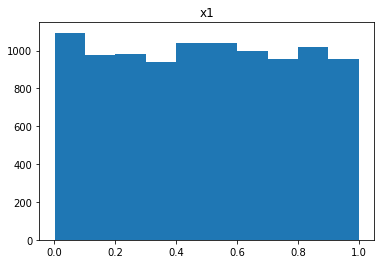

x1


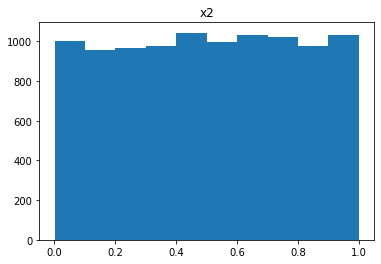

x2


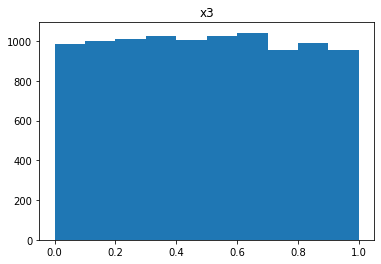

x3


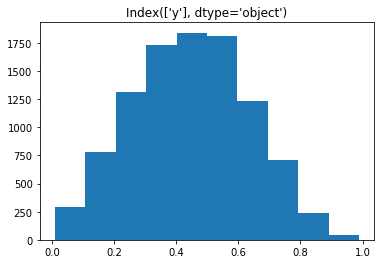

In [85]:
"""Some basic visualisation of data"""
for col in X_train.columns:
    plt.hist(X_train[col]) #Plots histogram based on values of selected column within X_train df.
    plt.title(col) #adjusts title of plot
    plt.show() #show plot
    plt.clf() #clear plot for the next for loop iteration
    print(col)
    
plt.hist(Y_train["y"]) #Plots histogram based on values of Y_train df.
plt.title(Y_train.columns)
plt.show()

In [87]:
"""Correlation between x variables and y"""
for col in X_train.columns:
    print("Correlation of", col, "and y =", str(round(np.corrcoef(X_train[col], Y_train['y'])[0][1], 2))) 

#np.corrcoef finds correlation between two arrays. 

Correlation of x1 and y = 0.59
Correlation of x2 and y = 0.78
Correlation of x3 and y = 0.19


In [99]:
"""Convert to numpy array (float32) because it is what Keras framework requires, and creating train-validation sets""" 
X_train = X_train.to_numpy() #.to_numpy() converts pandas array into numpy array
Y_train = Y_train.to_numpy().ravel() #.ravel() flattens array into a 1d array; required by keras
X_test = X_test.to_numpy()

#train_test_split function helps to split the X and Y dataframes into training and test validation set. 20% of the
#datapoints will be used for the validation set, while 80% will be used for training the neural network
x_train, x_valid, y_train, y_valid = train_test_split(X_train, 
                                                      Y_train, 
                                                      test_size = 0.2, 
                                                      random_state= 123)

In [100]:
#Identifying dtypes, and shape of numpy arrays
print(X_train.dtype)
print(X_train.shape)
print(Y_train.shape)

float64
(10000, 3)
(10000,)


In [102]:
"""Building Multi-Layer Perceptron (MLP)"""
model = None
model = Sequential() #Sets up the base for stacking the neural network

#Creates 2 layers of 4 neurons with linear activation function. First line need to define number of inputs 
#(i.e. number of x variables).
model.add(Dense(4, activation='linear', input_dim = 3))
model.add(Dense(4, activation='linear'))

#final ouput layer with one neurons only. 
model.add(Dense(1, activation='linear'))

#compile the model, selection of neural network optimiser as well as the loss function for learning of neural network
model.compile(optimizer="adam",loss="mse", metrics=[metrics.MeanSquaredError()])

#prints summary of neural network model
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [103]:
"""Train model"""
# EarlyStopping allows early stopping of neural network training when metric monitored (loss) stops improving for 
# specified number of epochs (3 in this case).
callback = EarlyStopping(monitor='loss', patience=3)

#Trains the neural network model and identifies fit through validation data. 303 epochs used, 
#with batchsize of 1000 to speed up training.
model_baseline = model.fit(x_train, 
                           y_train,
                           verbose = 3, 
                           validation_data = (x_valid, y_valid), 
                           epochs = 303,
                           batch_size = 1000,
                           callbacks = [callback])

Train on 8000 samples, validate on 2000 samples
Epoch 1/303
Epoch 2/303
Epoch 3/303
Epoch 4/303
Epoch 5/303
Epoch 6/303
Epoch 7/303
Epoch 8/303
Epoch 9/303
Epoch 10/303
Epoch 11/303
Epoch 12/303
Epoch 13/303
Epoch 14/303
Epoch 15/303
Epoch 16/303
Epoch 17/303
Epoch 18/303
Epoch 19/303
Epoch 20/303
Epoch 21/303
Epoch 22/303
Epoch 23/303
Epoch 24/303
Epoch 25/303
Epoch 26/303
Epoch 27/303
Epoch 28/303
Epoch 29/303
Epoch 30/303
Epoch 31/303
Epoch 32/303
Epoch 33/303
Epoch 34/303
Epoch 35/303
Epoch 36/303
Epoch 37/303
Epoch 38/303
Epoch 39/303
Epoch 40/303
Epoch 41/303
Epoch 42/303
Epoch 43/303
Epoch 44/303
Epoch 45/303
Epoch 46/303
Epoch 47/303
Epoch 48/303
Epoch 49/303
Epoch 50/303
Epoch 51/303
Epoch 52/303
Epoch 53/303
Epoch 54/303
Epoch 55/303
Epoch 56/303
Epoch 57/303


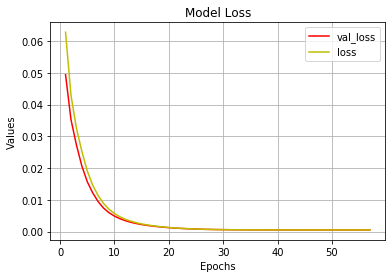

In [104]:
#Diagnostic plots. Pulling values from training history of neural network which is stored in the trained model
loss = model_baseline.history['loss']
val_loss = model_baseline.history['val_loss']

#Loss Curve

#plots loss of validation set from first to last entry
plt.plot(range(1,len(val_loss)+1), val_loss, "r-", label = "val_loss") 
#plots loss of training set from first to last entry
plt.plot(range(1,len(loss)+1), loss, "y-", label = "loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Values")

plt.legend()
plt.grid(True)
plt.show()


In [105]:
"""Fitting model to test dataset; generates prediction based on input X_test data using trained neural network"""
predictions = model.predict(X_test, verbose = 2) #identifying predictions based on X_test

2500/2500 - 0s


In [107]:
print(predictions.min())
print(predictions.max())

"""
I am aware that there should no have been any negative value predictions given how all of the y values in training
set ranged between 0 and 1. But for the sake of time, I will move on instead of optimising the model. It performed
better than SGD anyways, so I think it needs a bit of hyperparameter tweaking.
"""

-0.008378256
0.9125622


In [80]:
"""Creation of output file for submission"""

#save as having header "y", and no hex before the header. 
np.savetxt(r"Question 3/test_predicted.txt", predictions, header = "y", comments = "") 

0.57681614

## Question 4

In [219]:
"""Loading datasets + checking basic characteristics of dataset"""
q4_wd = os.path.join(wd, "Question 4")

#Reading files as Pandas df
image_1 = pd.read_csv(os.path.join(q4_wd, "input_question_4"), sep='\t', names = range(0,20))

#checking characteristics
print("Shape of input image:", image_1.shape)
image_1

Shape of input image: (10, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,1,1
1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0
2,0,1,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0
3,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,0,1,1
4,1,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1
5,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1
6,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1
7,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1
8,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1,1,1,0
9,1,0,1,0,1,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1


In [223]:
"""Identifying the 4-connectivity pattern of input image"""

#measure.label() is the function which takes in matrix and returns connectivity patterns of the input matrix.
all_labels = measure.label(image_1, connectivity = 1)

The measure.label() function allows the labelling of pixels in a certain matrix according to 4-connectivity 
or 8-connectivity. Zero-padding is assumed.

The concept of 4-connectivity is that for any given non-zero pixel (all "1"s to begin with), it will be grouped together with any other non-zero pixel on it's left, right, top, or bottom. Zero-pixels are not labelled or connected with any other pixels, even if it is surrounded by non-zero pixels. 

When there is a distance of more than 1 (i.e. a zero) between the first and the second group of pixels, the label of the second group will increase by 1 (i.e. the label is 2 for this group of pixels), same with the third group and so on.

This function depends on a 4-connectivity "sensor", which moves from left to right, top to bottom. The pixel in the centre of the 4-connectivity will be updated to the next highest pixel values of its 4 neighbours. It will also update any of its other neighbours which still has values of 1. __Having neighbours with values > 1 will overwrite the current group count value.__

Any non-zero pixels without any neighbours will be considered a group of its own, and will still have an incremented value from the previous group.

Iterations occur until the end of bottom right of the matrix has been reached. 



The same concept applies to the 8-connectivity algorithm, which includes detection of the diagonals of centre pixel as well. 

In [226]:
print(all_labels)

[[ 0  0  0  0  1  1  0  0  0  2  0  3  0  4  4  4  0  0  5  5]
 [ 6  0  7  0  0  0  0  0  2  2  0  0  0  0  4  0  0  8  0  0]
 [ 0  7  7  7  7  7  7  0  2  0  9  0 10  0  0  0  0  0 11  0]
 [ 0  0  0  0  7  7  0  0  0  0  9  0  0  0 11 11 11  0 11 11]
 [12  0  0 12  0  0  0  0  0  0  9  9  9  0 11 11 11  0 11 11]
 [12 12 12 12  0 13  0  0  0  0  0  0  0 14  0  0 11 11  0 11]
 [12 12  0  0  0  0 15  0  0  0  0 16 16  0  0  0  0 11  0 11]
 [ 0 12  0  0  0 15 15  0  0  0  0 16 16  0  0  0  0 11 11 11]
 [ 0  0 17 17 17  0  0 18  0 18  0  0 16  0  0  0 11 11 11  0]
 [19  0 17  0 17  0 18 18 18 18  0  0 16  0 20  0  0  0  0 21]]


In [177]:
"""Creation of output file for submission"""
np.savetxt(r"Question 4/output_question_4.txt", all_labels, fmt = '%.d')

## Question 5

In [241]:
"""Defining function to create square grid (matrix) for inserting beads """
def create_grid(row,col):
    #np.zeros creates an array of zeroes formatted as strings
    matrix = np.zeros(row*col, "str").reshape(row,col) #Zero np-array reshaped into specified dimensions
    
    #np.pad pads the square grid with zeroes on all 4 sides. Required so that the algorithm can "scan" 
    #the square grid properly.
    matrix = np.pad(matrix, pad_width = 1, mode = 'constant') 
    
    #returns created matrix
    return matrix

In [242]:
"""Creation of list of coordinates for square grid which will be used to define where on the square grid
to put the beads in"""

row = 64
col = 64

#Returns all possible permutations of coordinates. From a list of values, select 2 values which are different. 
#Also, coordinates will start from 1 for both row and col index because will use zero padding later
coordinates = itertools.permutations(range(1,row+1),2) 
coordinates = list(coordinates) #convert to list

#Because coordinates were created using permutations without replacement, need to fill in the gaps
for i in range(1,row+1): 
    coordinates.append((i,i)) #Will fill (1,1), (2,2), ....

#convert list to pandas because it's easier to sort    
coordinates = pd.DataFrame(coordinates, columns = ["row","col"]) 

#sort by row, followed by column so algorithm later will scan in proper order (Left to right, top to bottom)
coordinates = coordinates.sort_values(['row', 'col']) 

#convert back to numpy 
coordinates = coordinates.to_numpy() 

#coordinates #check

In [243]:
""" 
Main algorithm: A brief summary of what it should do is to scan the entire matrix (non-padded parts) from left 
to right, top to bottom. First coordinate selected is the (1,1) coordinate. A random bead will be selected from a 
"bag of beads" and will be put into the selected coordinate.

Based on that coordinate, beads on its left and top (i.e. the coordinates that have been scanned before), 
should not be the same of the chosen bead. If there is a bead of the same colour nearby, insert a different colour. 
Only when there are no other options, insert the only colour left. Penalty count will increase by 1 should this 
happen. 

After running several iterations, select the grid which resulted in the lowest penalty. 
"""

list_of_matrices = [] #list of matrices tested
penalty_list = [] #list of penalties tested

#iterates whole algorithm several times
for k in range(1000):
    """Initialising values"""
    #bag of beads for algorithm to pick beads from. This way of defining the beads will simulate the way beads
    #will be selected from in reality. I wanted to created an algorithm which will use the colour of higher numbers 
    #as much as possible to prevent them from aggregating at the end (expensive penalty).
    bag_of_beads = list('R'*139 + 'B'*1451 + 'G'*977 + 'W'*1072 + 'Y'*457)
    matrix = create_grid(row,col) #using function to create padded matrix
    penalty = 0 #penalty counter to identify how many conflicting colours there are

    #for each coordinate in the square grid (except the padding), select a bead to put in.
    for i,j in coordinates: #will pull the row (i) and column (j) coordinates.
        #use of np.random.choice because imbalanced dataset used. This will dictate the colour of the bead to be 
        #inserted into square grid. Because blue beads are of highest frequency in the bag of beads, will be
        #most likely to be chosen. Strive towards equilibrium of percentages of the different coloured marbles
        cur_bead = np.random.choice(bag_of_beads) #picks one bead from the list of beads

        left = matrix[i][j-1] #store values left of the selected coordinate 
        up = matrix[i-1][j] #store values above of the selected coordinate

        #if any of the beads match the ones on its left or top, change bead.
        if (left == cur_bead) or (up == cur_bead): 
            #this checks if there are any other colours to pick which is different from current bead.
            if (len([i for i in bag_of_beads if i != cur_bead]) > 0): 
                #choose another bead from list of beads which is different from bead at the top of selected
                #coordinates. In a better algorithm, it would also exclude the bead colour on the left of 
                #selected coordinates.
                cur_bead = np.random.choice([i for i in bag_of_beads if (i != up)]) 
                #insert bead into selected coordinate of square matrix
                matrix[i][j] = cur_bead 
            else: #else if there are no other options, just have to use the current bead chosen initially
                matrix[i][j] = cur_bead
                penalty += 1 #because if there's a match without another bead to use, will definitely have neighbours
                #with same coloured beads. 

        #else if current bead is different from left or top bead, insert current bead into selected coordinate
        else:
            matrix[i][j] = cur_bead

        #remove bead from bag of beads. Will adjust probability of the bead to be drawn from bag of beads
        bag_of_beads.remove(cur_bead)

    list_of_matrices.append(matrix) #append matrix to list of matrices
    penalty_list.append(penalty) #append penalty to list of penalties
    print(k) #check iterations happening

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [248]:
"""Converting list of matrices and penalties into a dataframe for sorting and choosing the one with the least
penalty"""
#zip function aligns 2 lists of equal lengths for easy conversion into dataframe
matrices_and_penalty = pd.DataFrame(zip(list_of_matrices, penalty_list), columns = ["matrices","penalty"])

#sorts values in combined dataframe according to penalty, from lowest to highest. inplace = to sort in place.
matrices_and_penalty.sort_values("penalty", inplace = True)
matrices_and_penalty.reset_index(inplace = True)

#extracting the matrix with the least penalty, which should be the first one of the sorted dataframe
best_matrix = matrices_and_penalty.loc[0,"matrices"]
print("Minimum penalty =", matrices_and_penalty.loc[0,"penalty"])

Minimum penalty = 45


In [249]:
#convert to pandas dataframe so i can remove the padding easily.
best_matrix = pd.DataFrame(best_matrix)

#coordinates of non-padded square grid, converted into numpy array
output_matrix = np.array(best_matrix.iloc[1:row+1,1:col+1]) 

#check if padding was removed successfully 
output_matrix

array([['Y', 'G', 'B', ..., 'R', 'B', 'G'],
       ['G', 'B', 'W', ..., 'B', 'Y', 'W'],
       ['W', 'G', 'B', ..., 'W', 'G', 'B'],
       ...,
       ['B', 'W', 'B', ..., 'G', 'B', 'G'],
       ['W', 'B', 'G', ..., 'W', 'W', 'B'],
       ['B', 'W', 'B', ..., 'B', 'B', 'B']], dtype=object)

In [250]:
#save to textfile
np.savetxt(r"Question 5/output question_5_2.txt", output_matrix, fmt = "%s")

### Part 2 of question 5 not attempted

## Question 6

In [60]:
"""Loading polygon coordinates and points coordinates"""
q6_wd = os.path.join(wd, "Question 6")

#Polygon coordinates
poly_coord = np.loadtxt(q6_wd + "/input_question_6_polygon")
print(poly_coord)

#Points coordinates
points_coord = np.loadtxt(q6_wd + "/input_question_6_points")
print(points_coord)

[[ 4.  3.]
 [ 2.  6.]
 [ 3. 12.]
 [ 2. 17.]
 [ 5. 20.]
 [ 9. 21.]
 [14. 19.]
 [20. 14.]
 [18.  3.]
 [11.  7.]]
[[ 7. 11.]
 [10. 14.]
 [11.  4.]
 [12. 21.]
 [16.  3.]
 [16. 10.]
 [17.  4.]
 [18.  7.]
 [18. 17.]
 [20.  7.]]


[[4.0, 3.0], [2.0, 6.0], [3.0, 12.0], [2.0, 17.0], [5.0, 20.0], [9.0, 21.0], [14.0, 19.0], [20.0, 14.0], [18.0, 3.0], [11.0, 7.0], [4.0, 3.0]]
[4.0, 3.0] [2.0, 6.0] [3.0, 12.0] [2.0, 17.0] [5.0, 20.0] [9.0, 21.0] [14.0, 19.0] [20.0, 14.0] [18.0, 3.0] [11.0, 7.0] [4.0, 3.0]


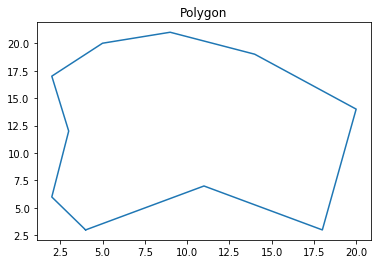

In [9]:
"""Visualising polygon"""
coord = poly_coord.tolist() #formating polygon coordinates into list-form 
coord.append(coord[0]) #Append first coordinates to end of polygon coordinates to ensure closed-loop polygon

#* unpacks values within list, zip to return a list of tuples, and return x and y values of all tuples accordingly
x_values, y_values = zip(*coord) 

plt.plot(x_values,y_values) #Plotting y values again x values
plt.title("Polygon")
plt.show()

In [11]:
"""Creating Shapely polygon object"""
#What shapely.geometry.Polygon does is that it creates a Polygon object which covers an area within a Cartesian 
#plane. It is possible to then see if there are any specified points which overlap with this area. Uses point-set 
#topology. 
poly = Polygon(coord)

In [38]:
#creates list of output: the coordinates of a point, and whether the point lies inside or outside the polygon
output = []
for coords in points_coord:
    x, y = coords #extract x and y values of each coordinate point
    point = Point(x,y) #Convert x and y point into a shapely.geometry.Point object
    within_poly = point.within(poly) #check for any overlaps of objects. If there is an overlap, will return True
    if within_poly == True: #if true, then concatenate the coordinates, and indicate that it lies "Inside"
        evaluation = str(int(x)) + " " + str(int(y)) + " Inside" 
        output.append(evaluation) #append coordinates and location to output list
    else: #if true, then concatenate the coordinates, and indicate that it lies "Outside"
        evaluation = str(int(x)) + " " + str(int(y)) + " Outside" 
        output.append(evaluation) #append coordinates and location to output list

output = np.array(output) #convert to numpy array and save to text file for submission
np.savetxt(r"Question 6/output_question_6.txt", output, fmt="%s")

## Question 7

### Question 7.1a

The formula for converting __coordinates to index__ is:

$$I = x_1 + x_2 \times L1$$ 


where $L1$ = Length of individual rows, $x1$ = $x1$ coordinate, $x2$ = $x2$ coordinate, and $I$ = Index of selected coordinates.


The formula for converting __index to coordinates__ is:

$$x_1 = I\bmod L1$$
$$x_2 = \lfloor I\div L1 \rfloor$$

where $L1$ = Length of individual rows, $x1$ = $x1$ coordinate, $x2$ = $x2$ coordinate, and $I$ = Index of selected coordinates

### Question 7.1b

In [77]:
"""Setting directory of files"""
q7_wd = os.path.join(wd, "Question 7")
q7_1_wd = os.path.join(q7_wd, "Question 7.1")

In [78]:
"""Testing out the formula to convert coordinates to index"""
L1 = 4 #set number of columns
L2 = 3 #set number of rows

x1 = eval(input("Key in x1 value: ")) # I want to input some values to test out whether the formula works or not.
x2 = eval(input("Key in x2 value: "))
index = x1 + x2*L1 #formula to return x1 and x2 values
print(index)

Key in x1 value: 2
Key in x2 value: 2
10


In [63]:
"""Loading input file's coordinates"""
#read as pandas dataframe because it's more visual
input_coords = pd.read_csv(os.path.join(q7_1_wd, "input_coordinates_7_1.txt"), delimiter = "\t") 
input_coords

,x1,x2
0,16,55
1,27,10
2,48,8
3,48,2
4,5,47
5,36,48
6,24,4
7,19,55
8,43,8
9,22,38


In [79]:
"""Calculating index"""
l1 = 50 #setting length of row for calculation of index. l2 not needed for calculations on 2D plane

#Using the previously tested formula: index = x1 + x2*L1
input_coords["index"] = input_coords["x1"] + input_coords["x2"]*l1 

In [80]:
"""Creating output file"""
output_indexes = input_coords["index"]

#save output as numpy array, with header index, formatted as strings, and no comments to be made before index.
np.savetxt(os.path.join(q7_1_wd, "output_index_7_1.txt"), output_indexes.to_numpy(),header = "index", 
           fmt = "%s", comments = "") 

In [37]:
"""Testing out the formula to convert index to coordinates"""
L1 = 5
L2 = 3

index = eval(input("Key in desired index: "))
x1 = index%L1 #test formula for calculating x1
x2 = index//L1#test formula for calculating x2
print("x1 = %d; x2 = %d" % (x1,x2)) #prints out the x1 and x2 values which was generated using the formulas tested
print("coordinates =", str((x1,x2))) #formats coordinates

Key in desired index: 15
x1 = 0; x2 = 3
coordinates = (0, 3)


In [75]:
"""Calculating coordinates"""
input_index = pd.read_csv(os.path.join(q7_1_wd, "input_index_7_1.txt"))

l1 = 50 #setting length of row for calculation of index

input_index["x1"] = input_index["index"]%l1 #As per the aforementioned formula. Input into new column in dataframe
input_index["x2"] = input_index["index"]//l1 #As per the aforementioned formula. Input into new column in dataframe

In [76]:
"""Creating output file"""
output_coords = input_index[["x1", "x2"]]

np.savetxt(os.path.join(q7_1_wd, "output_coordinates_7_1.txt"), output_coords.to_numpy(),
           header = "x1\tx2", delimiter = "\t",fmt = "%s", comments = "")

### Question 7.2a

The formula for converting __coordinates to index__ in d-dimensional grid is:

$I = \sum_{i=1}^{d} \big(x_i \times \prod_{k=0}^{i-1} l_k\big)$ 

where $i$ represents the axis coordinates desired i.e. $x_i$, $d$ represents number of dimensions in total, $l_k$ represents the dimensions of specific layers selected.
_P.S. I know the part of the product function does not make sense, but it's the best way that I can put it.
The formula used in the algorithm below should be more reflective of my understanding_.


The formula for converting __index to coordinates__ in d-dimensional grid is a lot more convoluted and I had no idea how to generalise it. As such, I will just describe my thought process behind the formula that I will use in my code below. 

Basically, it is a recursive formula which always removes the values of the higher dimensions, by effect reducing the dimensions which a selected index would be involved in. An example would be for a 3x3x3x3 4D grid, if I wanted to access the x1 and x2 coordinates, I would have to first remove the possible values of  all values in a 3x3x3 3D grid which equals to 27. The modulus function is used to do so, so as to no alter any values within the 3x3x3 grid (which goes up to 26). Another way to put it would be that if i wanted to access an index which exists on the 3rd dimension, I will have to map the value which may exist on the nth dimension to the 3rd dimension. 

The coordinates within the highest dimension of d-dimensional grid will always be found using a flooring function of the index after division by the multiplication of all dimensions of all lower-dimension layers within the d-dimensional grid.

### Question 7.2b

In [12]:
"""Creating function to convert coordinates in 6-dimensional grid to index"""
l1,l2,l3,l4,l5,l6 = (4,8,5,9,6,7) #defining structure of 6D grid

# defining the products of dimensions of the various dimensions.
prod_l1=l1 
prod_l2=l1*l2
prod_l3=l1*l2*l3
prod_l4=l1*l2*l3*l4
prod_l5=l1*l2*l3*l4*l5

#defining function to generate index from the input coordinates
def to_index(x1,x2,x3,x4,x5,x6):
    index = x1 + x2*prod_l1 + x3*prod_l2 + x4*prod_l3 + x5*prod_l4 + x6*prod_l5 #formula to calculate index
    return index #return index to store in dataframe

In [244]:
"""Importing input coordinates"""
q7_wd = os.path.join(wd, "Question 7")
q7_2_wd = os.path.join(q7_wd, "Question 7.2")

#read input as dataframe because it's easier to view
input_coords = pd.read_csv(os.path.join(q7_2_wd, "input_coordinates_7_2.txt"), delimiter = "\t")
#create columns of zeroes so function can input respective values later.
input_coords["index"] = np.zeros(len(input_coords), 'int')
input_coords #test

,x1,x2,x3,x4,x5,x6,index
0,3,2,2,7,4,6,0
1,0,0,0,0,2,5,0
2,0,2,1,4,5,6,0
3,2,7,3,4,5,6,0
4,2,5,1,3,1,2,0
5,3,6,2,7,3,6,0
6,1,5,4,1,2,1,0
7,0,5,3,2,4,2,0
8,2,4,4,7,4,3,0
9,0,3,0,1,0,0,0


In [25]:
"""For every row of coordinates in dataframe, input the 6 different coordinates, and put calculated output into 
index column in dataframe"""
for row in range(len(input_coords)):
    input_coords.loc[row,"index"] = to_index(input_coords.loc[row,"x1"],
                                            input_coords.loc[row,"x2"],
                                            input_coords.loc[row,"x3"],
                                            input_coords.loc[row,"x4"],
                                            input_coords.loc[row,"x5"],
                                            input_coords.loc[row,"x6"])

In [40]:
"""Creating output file"""
output_indexes = input_coords["index"]
np.savetxt(os.path.join(q7_2_wd, "output_index_7_2.txt"), output_indexes.to_numpy(),header = "index", 
           fmt = "%s", comments = "")

In [41]:
"""Importing input index"""
input_index = pd.read_csv(os.path.join(q7_2_wd, "input_index_7_2.txt"), delimiter = "\t")

In [ ]:
"""Initialising important variables"""
l1,l2,l3,l4,l5,l6 = (4,8,5,9,6,7) #defining structure of 6D grid

# defining the products of dimensions of the various dimensions.
prod_l1=l1
prod_l2=l1*l2
prod_l3=l1*l2*l3
prod_l4=l1*l2*l3*l4
prod_l5=l1*l2*l3*l4*l5

In [45]:
"""Calculation of each coordinates after mapping back index to the correct dimension"""
input_index["x1"] = input_index["index"]%prod_l5%prod_l4%prod_l3%prod_l2%prod_l1
input_index["x2"] = input_index["index"]%prod_l5%prod_l4%prod_l3%prod_l2//prod_l1
input_index["x3"] = input_index["index"]%prod_l5%prod_l4%prod_l3//prod_l2
input_index["x4"] = input_index["index"]%prod_l5%prod_l4//prod_l3
input_index["x5"] = input_index["index"]%prod_l5//prod_l4
input_index["x6"] = input_index["index"]//prod_l5

In [47]:
"""Creating output file"""
output_coords = input_index[["x1", "x2", "x3", "x4", "x5", "x6"]]

#Convert table to numpy, save with the respective column headers, delimited by tabs in string format.
np.savetxt(os.path.join(q7_2_wd, "output_coordinates_7_2.txt"), output_coords.to_numpy(),
           header = "x1\tx2\tx3\tx4\tx5\tx6", delimiter = "\t",fmt = "%s", comments = "")